### Noise remove

In [3]:
noise_list = ['is','a','this']
def remove_noise(text_):
  words = text_.split()
  noise_free = [word for word in words if word not in noise_list]
  noise_free = ' '.join(noise_free)
  return noise_free

remove_noise("this is a sample text")

'sample text'

### Remove by Regex

In [5]:
import re

def remove_regex(input_text, regex_pattern):
  find_pattern = re.finditer(regex_pattern, input_text)
  for i in find_pattern:
    text = re.sub(i.group().strip(), "", input_text)
  
  return text

reg_pattern = "#[\w]*"
print(remove_regex("I am with #DrKC movement.", reg_pattern))

I am with  movement.


### Stop Words

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
example_sent = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(example_sent) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(word_tokens) 
print(filtered_sentence) 

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


### Stemming and lemmatizing

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer 
stem = PorterStemmer()

word = "multiplying"

print(lem.lemmatize(word))
print(stem.stem(word))

multiplying
multipli


### POS tag

In [16]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
from nltk import word_tokenize, pos_tag
text = "I am learning Natural Language Processing on Leapfrog Technology"
tokens = word_tokenize(text)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('learning', 'VBG'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('on', 'IN'), ('Leapfrog', 'NNP'), ('Technology', 'NNP')]


In [0]:
# POS tag list:
# CC coordinating conjunction
# CD cardinal digit
# DT determiner
# EX existential there (like: "there is" ... think of it like "there exists")
# FW foreign word
# IN preposition/subordinating conjunction
# JJ adjective 'big'
# JJR adjective, comparative 'bigger'
# JJS adjective, superlative 'biggest'
# LS list marker 1)
# MD modal could, will
# NN noun, singular 'desk'
# NNS noun plural 'desks'
# NNP proper noun, singular 'Harrison'
# NNPS proper noun, plural 'Americans'
# PDT predeterminer 'all the kids'
# POS possessive ending parent's
# PRP personal pronoun I, he, she
# PRP$ possessive pronoun my, his, hers
# RB adverb very, silently,
# RBR adverb, comparative better
# RBS adverb, superlative best
# RP particle give up
# TO to go 'to' the store.
# UH interjection errrrrrrrm
# VB verb, base form take
# VBD verb, past tense took
# VBG verb, gerund/present participle taking
# VBN verb, past participle taken
# VBP verb, sing. present, non-3d take
# VBZ verb, 3rd person sing. present takes
# WDT wh-determiner which
# WP wh-pronoun who, what
# WP$ possessive wh-pronoun whose
# WRB wh-abverb where, when

## Ml pre-approach

### N-gram

In [19]:
def generate_ngrams(text, n):
    words = text.split()
    output = []  
    for i in range(len(words)-n+1):
        output.append(words[i:i+n])
    return output

generate_ngrams('Now we will generate ngram', 2)

[['Now', 'we'], ['we', 'will'], ['will', 'generate'], ['generate', 'ngram']]

### Countvectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Tfidf Vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer()
corpus = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document']
X = obj.fit_transform(corpus)
print(X)
print(obj.get_feature_names())

  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


## Text classification

### NBC example

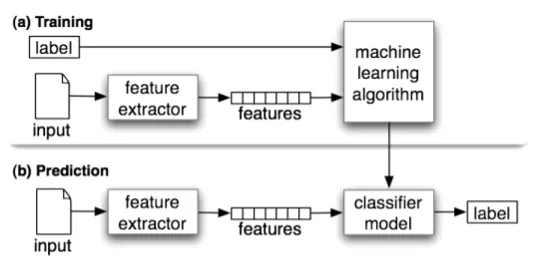

In [26]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob
training_corpus = [
                   ('I am exhausted of this work.', 'Class_B'),
                   ("I can't cooperate with this", 'Class_B'),
                   ('He is my badest enemy!', 'Class_B'),
                   ('My management is poor.', 'Class_B'),
                   ('I love this burger.', 'Class_A'),
                   ('This is an brilliant place!', 'Class_A'),
                   ('I feel very good about these dates.', 'Class_A'),
                   ('This is my best work.', 'Class_A'),
                   ("What an awesome view", 'Class_A'),
                   ('I do not like this dish', 'Class_B')]
test_corpus = [
                ("I am not feeling well today.", 'Class_B'), 
                ("I feel brilliant!", 'Class_A'), 
                ('Gary is a friend of mine.', 'Class_A'), 
                ("I can't believe I'm doing this.", 'Class_B'), 
                ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')]

model = NBC(training_corpus)
print(model.classify("Their codes are amazing."))

Class_A


### SVM model

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn import svm 

# preparing data for SVM model (using the same training_corpus, test_corpus from naive bayes example)
train_data = []
train_labels = []
for row in training_corpus:
    train_data.append(row[0])
    train_labels.append(row[1])

test_data = [] 
test_labels = [] 
for row in test_corpus:
    test_data.append(row[0]) 
    test_labels.append(row[1])

# Create feature vectors 
vectorizer = TfidfVectorizer(min_df=4, max_df=0.9)
# Train the feature vectors
train_vectors = vectorizer.fit_transform(train_data)
# Apply model on test data 
test_vectors = vectorizer.transform(test_data)

# Perform classification with SVM, kernel=linear 
model = svm.SVC(kernel='linear') 
model.fit(train_vectors, train_labels) 
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

     Class_A       0.50      0.67      0.57         3
     Class_B       0.50      0.33      0.40         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



In [31]:
prediction = model.predict(test_vectors)
print(prediction)

['Class_A' 'Class_A' 'Class_B' 'Class_B' 'Class_A' 'Class_A']
